## Exercici 1

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify 
filepath = "https://raw.githubusercontent.com/leobioinf0/Supervitat_Regressio/main/DelayedFlights25mb.csv"
airlineData = pd.read_csv(filepath, index_col=0)
airlineData.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [35]:
airlineData.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,5,13,2,1130.0,1115,1419.0,1343,AA,283,...,6.0,15.0,0,N,0,15.0,0.0,21.0,0.0,0.0
1,2008,5,8,4,1646.0,1640,1748.0,1730,WN,2871,...,3.0,25.0,0,N,0,0.0,0.0,12.0,0.0,6.0
2,2008,12,25,4,1619.0,1555,1732.0,1705,WN,1857,...,5.0,11.0,0,N,0,0.0,0.0,3.0,0.0,24.0
3,2008,3,20,4,1351.0,1345,1600.0,1535,US,953,...,4.0,26.0,0,N,0,6.0,0.0,19.0,0.0,0.0
4,2008,2,19,2,1950.0,1935,2102.0,2050,MQ,4445,...,11.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN


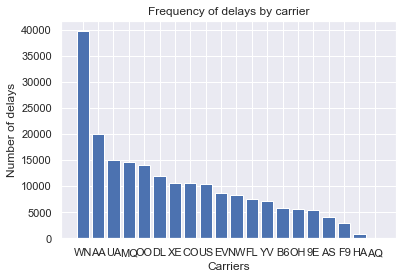

In [19]:
x = airlineData["UniqueCarrier"]
y = airlineData["UniqueCarrier"].value_counts()

plt.bar(y.index, y.values)

plt.title("Frequency of delays by carrier")
plt.ylabel("Number of delays")
plt.xlabel("Carriers")
plt.savefig("fig1.png")

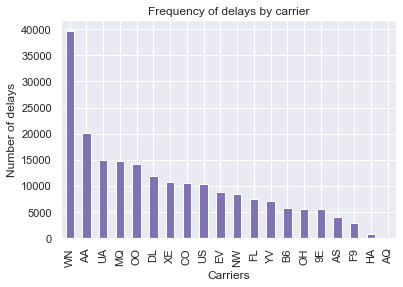

In [18]:
airlineData["UniqueCarrier"].value_counts().plot(kind="bar", color='m')

plt.title("Frequency of delays by carrier")
plt.ylabel("Number of delays")
plt.xlabel("Carriers")
plt.savefig("fig2.png")

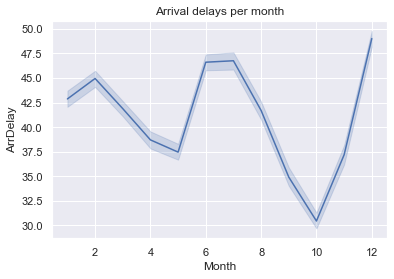

In [20]:
##Visualització: Una variable numèrica (ArrDelay)
sns.lineplot(data=airlineData, x="Month", y="ArrDelay")
plt.title("Arrival delays per month")
plt.savefig("fig3.png")

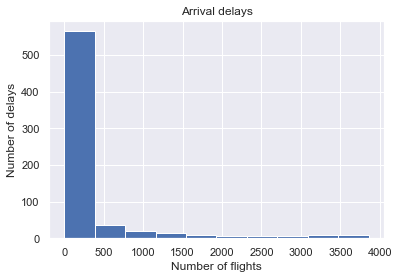

In [21]:
##Visualització: Una variable numèrica (ArrDelay)
airlineData.value_counts("ArrDelay").plot(kind="hist")

plt.title("Arrival delays")
plt.ylabel("Number of delays")
plt.xlabel("Number of flights")
plt.savefig("fig4.png")

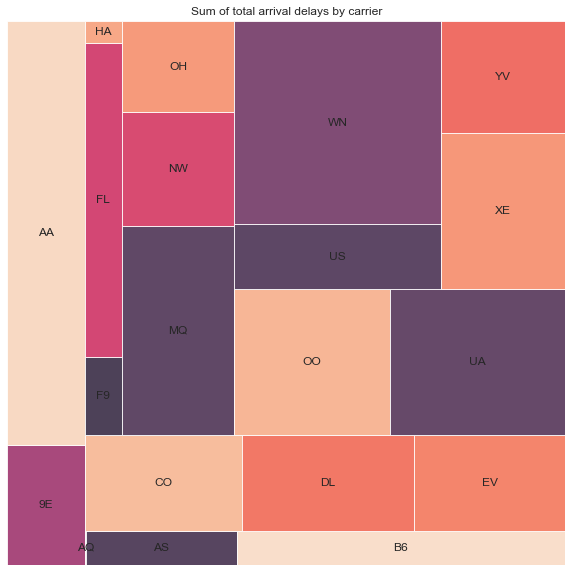

In [22]:
## Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
plt.figure(figsize=(10, 10))
grouped_air = airlineData.groupby("UniqueCarrier")[["ArrDelay"]].sum()
squarify.plot(sizes = grouped_air.values, label=grouped_air.index, alpha= 0.8)
plt.axis("off")
plt.title("Sum of total arrival delays by carrier")     
plt.savefig("fig5.png")

In [9]:
## Dues variables numèriques (ArrDelay i DepDelay)
y1 = airlineData.groupby("Month")[["ArrDelay"]].sum()
y2 = airlineData.groupby("Month")[["DepDelay"]].sum()
print(y1,y2)

        ArrDelay
Month           
1       832404.0
2       888043.0
3       882086.0
4       627868.0
5       602032.0
6       980956.0
7       891986.0
8       702595.0
9       353973.0
10      328909.0
11      408297.0
12     1031718.0         DepDelay
Month           
1       850208.0
2       890497.0
3       904853.0
4       646575.0
5       627843.0
6       973127.0
7       906789.0
8       745342.0
9       387533.0
10      364648.0
11      438950.0
12     1037907.0


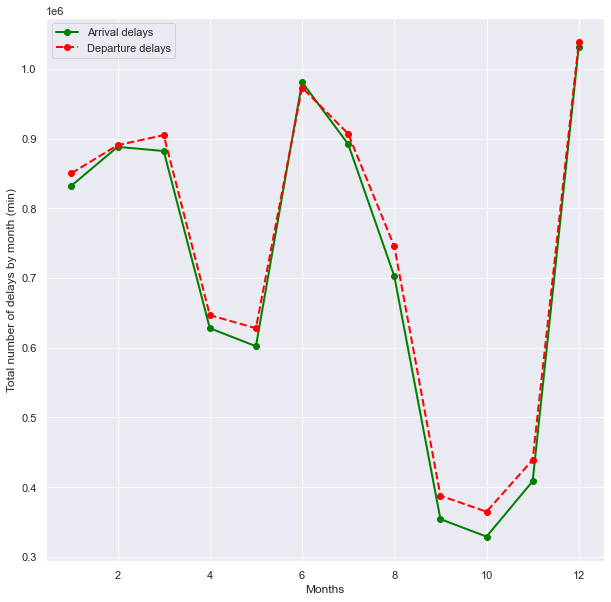

In [23]:
## Dues variables numèriques (ArrDelay i DepDelay)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

y1 = airlineData.groupby("Month")[["ArrDelay"]].sum()
y2 = airlineData.groupby("Month")[["DepDelay"]].sum()

plt.plot(y1, linestyle ='-', marker ='o',color='green', linewidth=2, label="Arrival delays")
plt.plot(y2, linestyle ='dashed', marker ='o', color='red', linewidth=2, label="Departure delays")

#fig, ax = plt.subplots(2,1, sharex=True)
#ax[0].plot(y1)
#ax[1].plot(y2);

plt.legend() 
plt.xlabel("Months")
plt.ylabel("Total number of delays by month (min)")
plt.savefig("fig6.png")

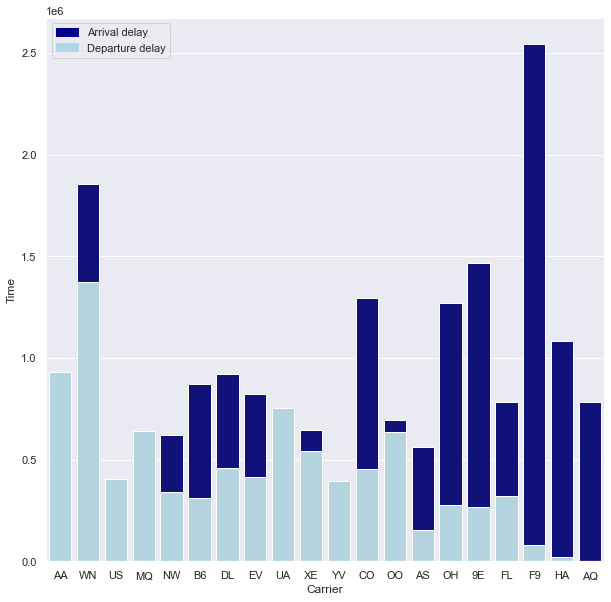

In [25]:
## Tres variables (ArrDelay, DepDelay i UniqueCarrier)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

airlineData["ArrDepDelay"] = airlineData["DepDelay"] + airlineData["ArrDelay"]
total = airlineData.groupby("UniqueCarrier")[["ArrDepDelay"]].sum().reset_index()

bar1= sns.barplot(x="UniqueCarrier",  y="ArrDepDelay", data=total, color='darkblue')
bar2 = sns.barplot(x="UniqueCarrier", y="DepDelay", data=airlineData, estimator=sum, ci=None,  color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label="Arrival delay")
bottom_bar = mpatches.Patch(color='lightblue', label="Departure delay")
plt.legend(handles=[top_bar, bottom_bar])

plt.xlabel("Carrier")
plt.ylabel("Time")
plt.savefig("fig7.png")

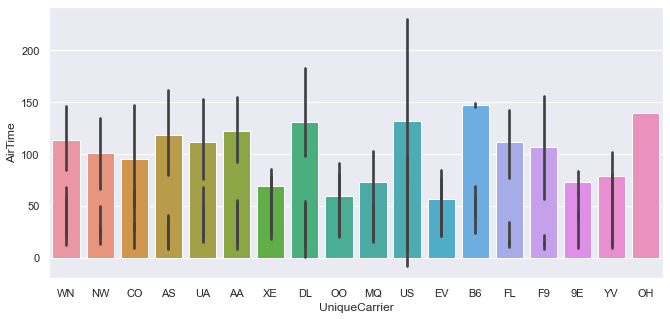

In [6]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
sns.set(style="darkgrid")
data_set_vols = airlineData.sample(n = 100)

fig, ax = plt.subplots(figsize=(11,5))

plot1 = sns.barplot(x="UniqueCarrier", y="ArrDelay", data=data_set_vols , label= "Arrival Delay")
plot2 = sns.barplot(x="UniqueCarrier", y="DepDelay", data=data_set_vols ,label="Departure Delay")
plot3 = sns.barplot(x="UniqueCarrier", y="AirTime" , data=data_set_vols ,label="Air Time")

#labels = airlineData("UniqueCarrier").index
#x = np.arange(len(labels_carrier))  

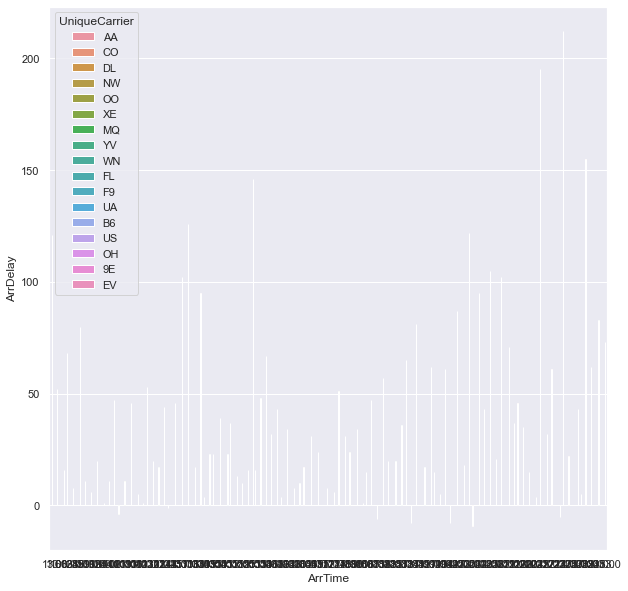

In [7]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
data_set_vols = airlineData.sample(n = 100)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

sns.barplot(x="ArrTime", y="ArrDelay", hue="UniqueCarrier", data=data_set_vols )
plt.show()

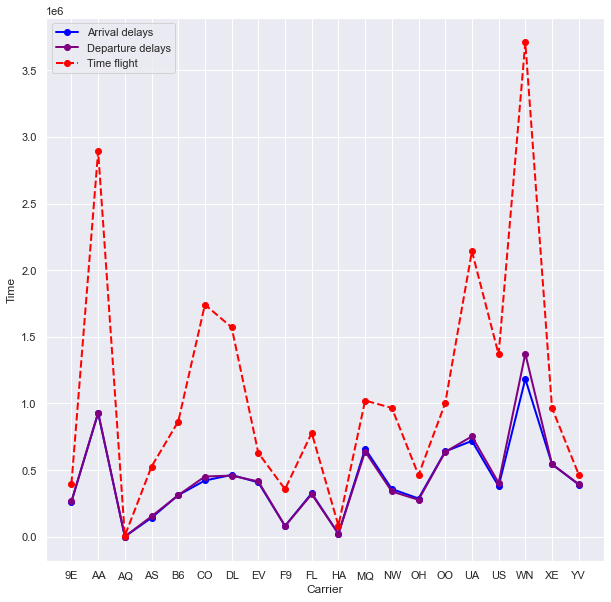

In [27]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

z1 = airlineData.groupby("UniqueCarrier")[["ArrDelay"]].sum()
z2 = airlineData.groupby("UniqueCarrier")[["DepDelay"]].sum()
z3 = airlineData.groupby("UniqueCarrier")[["AirTime"]].sum()

plt.plot(z1, linestyle ='-', marker ='o',color='blue', linewidth=2, label="Arrival delays")
plt.plot(z2, linestyle ='-', marker ='o', color='purple', linewidth=2, label="Departure delays")
plt.plot(z3, linestyle ='dashed', marker ='o', color='red', linewidth=2, label="Time flight")

plt.legend() 
plt.xlabel("Carrier")
plt.ylabel("Time")
plt.savefig("fig8.png")

## Exercici 2

In [ ]:
#Exporta els gràfics com imatges o com html.

## Exercici 3

In [28]:
#Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.
!nbmerge S02_T05_Estructures_Dataframe.ipynb  S03_T01_Visualitzacio_exploratoria.ipynb > S03_T01_S02_T05_merged.ipynb